In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

In [2]:
# importing the scraped articles dataset
df = pd.read_csv('NYT_Articles.csv')

In [3]:
df

,title,abstract,paragraph,date,text,text_clean
0,Here’s a Way to Learn if Facial Recognition Sy...,An online tool targets only a small slice of w...,When tech companies created the facial recogni...,2021-01-31T10:00:13+0000,Here’s a Way to Learn if Facial Recognition Sy...,way learn facial recognition system used photo...
1,Inside a Pro-Huawei Influence Campaign,A covert online push to sway telecommunication...,"LONDON — Edwin Vermulst, a trade lawyer in Bru...",2021-01-29T10:00:28+0000,Inside a Pro-Huawei Influence Campaign A cover...,inside pro huawei influence campaign covert on...
2,"To Get on This SpaceX Flight, You Don’t Have t...","Jared Isaacman, 37-year-old founder of Shift4 ...","A new era is opening in spaceflight, a future ...",2021-02-01T21:05:11+0000,"To Get on This SpaceX Flight, You Don’t Have t...",get spacex flight rich lucky jared isaacman y...
3,They Found a Way to Limit Big Tech’s Power: Us...,Companies inspired by the cryptocurrency are c...,To hear more audio stories from publishers lik...,2021-01-26T10:00:20+0000,They Found a Way to Limit Big Tech’s Power: Us...,found way limit big tech power using design bi...
4,What is a Blockchain? Is It Hype?,A technology based on a decentralized network ...,This article is part of the On Tech newsletter...,2021-01-26T18:10:35+0000,What is a Blockchain? Is It Hype? A technology...,blockchain hype technology based decentralized...
...,...,...,...,...,...,...
10422,What to Cook This Week,"Butternut squash congee, pasta alla Brontese a...",Good morning. Even the best home cooks have Th...,2022-11-13T16:00:04+0000,What to Cook This Week Butternut squash congee...,cook week butternut squash congee pasta alla b...
10423,"What Holds a Marriage Together, or Doesn’t","Marriage: Tom and Gisele’s, and others’. Also:...",To the Editor:,2022-11-20T14:00:11+0000,"What Holds a Marriage Together, or Doesn’t Mar...",hold marriage together marriage tom gisele oth...
10424,Tracking the Climate Toll as Leaders Meet,Readers discuss climate change as the summit i...,To the Editor:,2022-11-08T17:52:29+0000,Tracking the Climate Toll as Leaders Meet Read...,tracking climate toll leader meet reader discu...
10425,A Dire Outlook as Climate Action Falls Short,Readers discuss an article about how nations f...,To the Editor:,2022-11-04T15:12:36+0000,A Dire Outlook as Climate Action Falls Short R...,dire outlook climate action fall short reader ...


In [4]:
# initialize the vectorizer
vectorizer = TfidfVectorizer()
# fit_transform applies TF-IDF to clean texts
X = vectorizer.fit_transform(df['text_clean'])

# K-means clustering

We will first determine what would be the best number of cluster (K) value to use with the elbow method.
Here the elbow method rely on a the inertia, which is the sum of the squared distances between each point and its closest K-means center. K will be chosed by the number of cluster where the inertia starts to decrease monotonously. 

In [5]:
Sum_of_squared_distances = []

for k in range(10,80,10):
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    y = km.fit_predict(X)


For n_clusters = 10 The average silhouette_score is: 0.004608827300580649
For n_clusters = 20 The average silhouette_score is: 0.008869499031850601
For n_clusters = 30 The average silhouette_score is: 0.011106071726151887
For n_clusters = 40 The average silhouette_score is: 0.011280616613189387
For n_clusters = 50 The average silhouette_score is: 0.012021836494711129
For n_clusters = 60 The average silhouette_score is: 0.012673030407514588
For n_clusters = 70 The average silhouette_score is: 0.012959739153115461


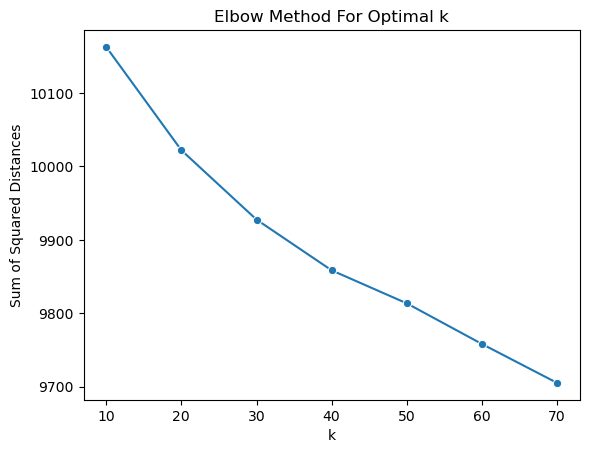

In [6]:
sns.lineplot(x=range(10,80,10), y=Sum_of_squared_distances, marker="o")

plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

We choose K=20 as the ideal number of cluster, because the inertia seems to decrease slower after this value.

In [7]:
import pickle

# creating and saving the k-mean model with 20 clusters
K = 20
model = KMeans(init="k-means++", n_clusters= K).fit(X)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# saving the vectorizer
with open("vectorizer_tfidf.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [8]:
# assigning a cluster label to each item in the dataset
df["clusters"] = model.predict(X)

In [12]:
df.to_csv('NYT_articles_2022_clustered.csv',index=False)

# Cluster analysis

In [13]:
# checking the 10 most important words of each cluster (nearest and including centroids)

centroids = km.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(K):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: china xi beijing country jinping new biden state war leader
Cluster 1: energy clean oil gas renewable wind solar transition green climate
Cluster 2: republican democrat bill senate house committee trump voting party bipartisan
Cluster 3: job worker pandemic work employer may help people program get
Cluster 4: tesla autopilot car driver driving safety electric billion automaker system
Cluster 5: music sound artist composer classical electronic black streaming musician song
Cluster 6: quiz news see stack time follow reader well weekly week
Cluster 7: space nasa launch rocket astronaut spacex moon mission crew orbit
Cluster 8: monday briefing russia plus trump mariupol sudan protester myanmar covid
Cluster 9: one said another world way time new people first year
Cluster 10: astrazeneca vaccine atlanta dickens runoff dos briefing result troubling mayor
Cluster 11: tax global minimum plan treasury biden democrat raise billion corporate
Cluster 12: electric car vehicle battery aut

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
def frequencies_dict(cluster_index):
    if cluster_index > K - 1:
        return
    term_frequencies = km.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

In [15]:
def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

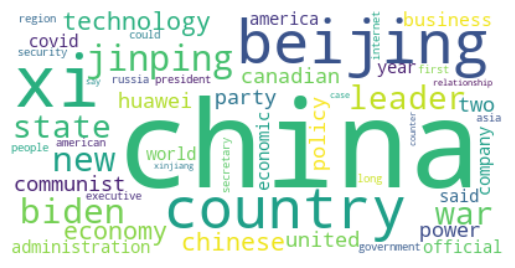

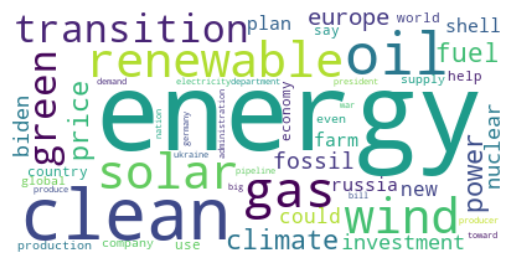

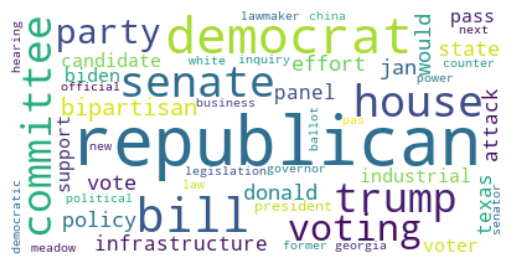

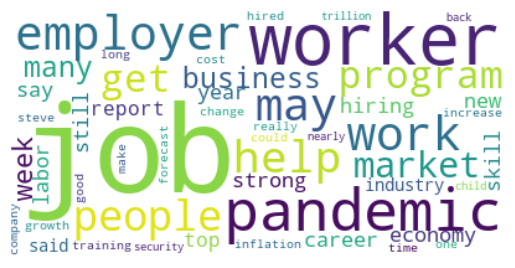

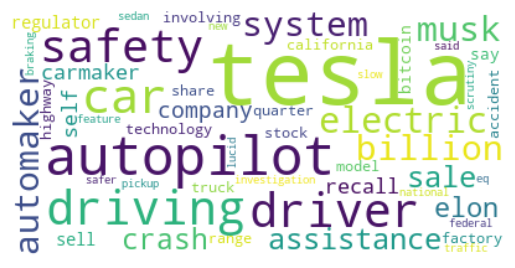

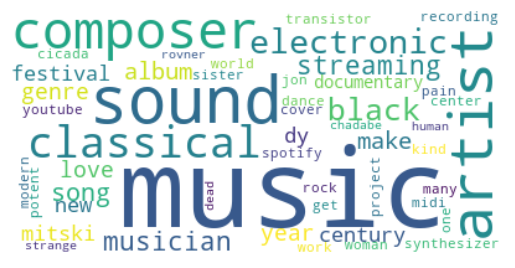

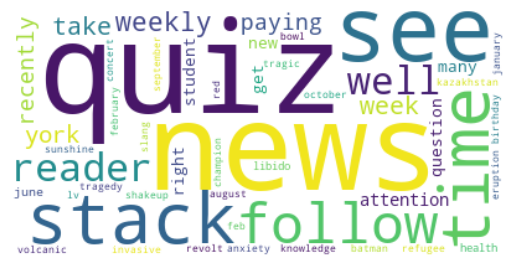

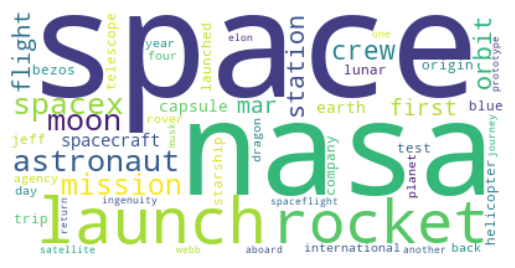

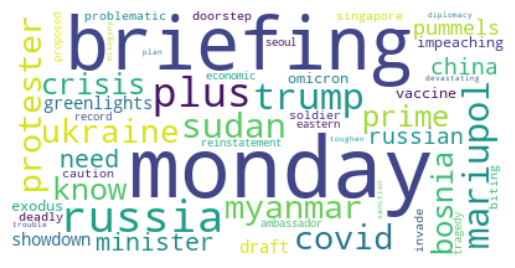

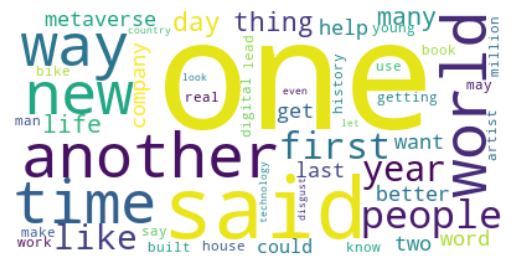

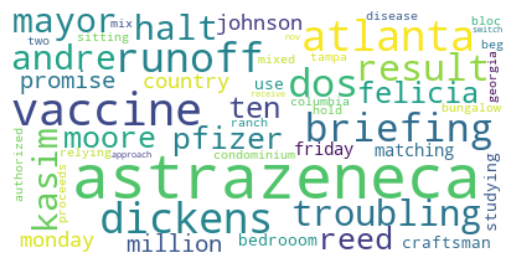

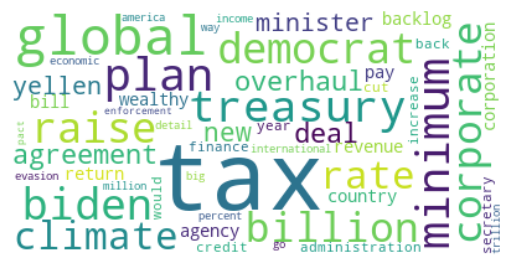

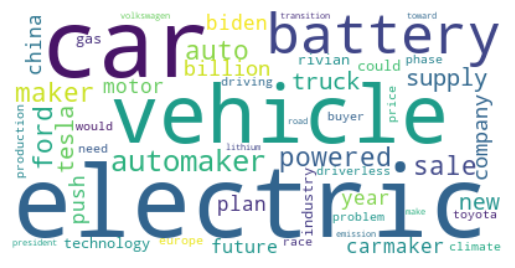

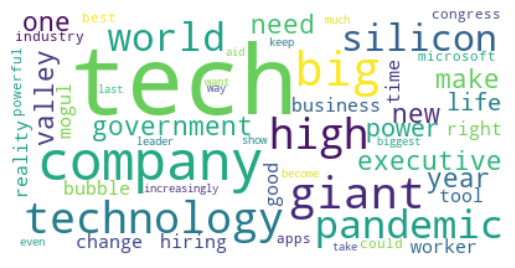

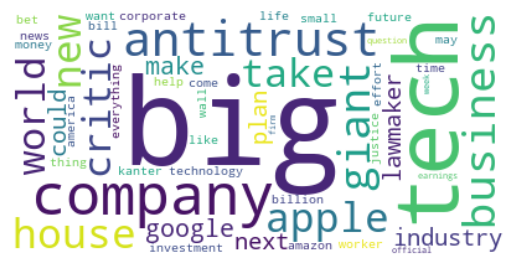

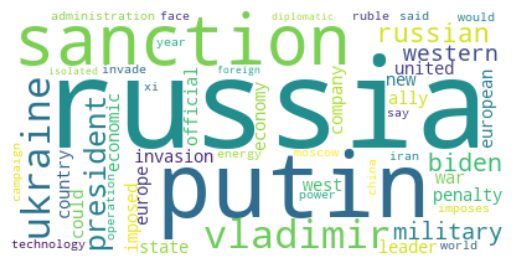

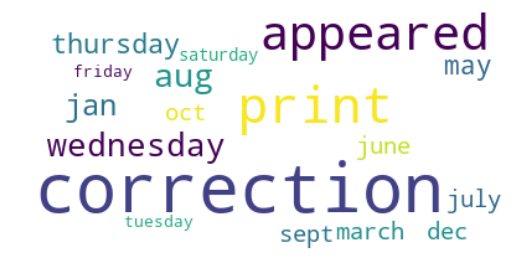

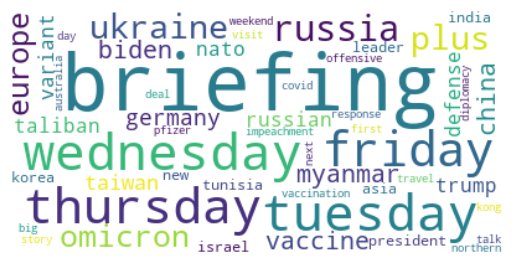

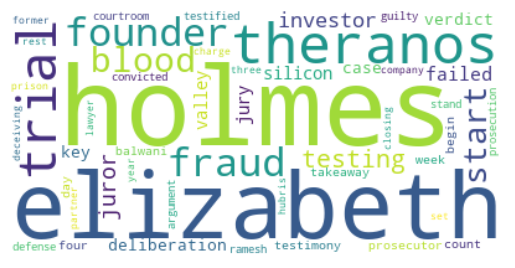

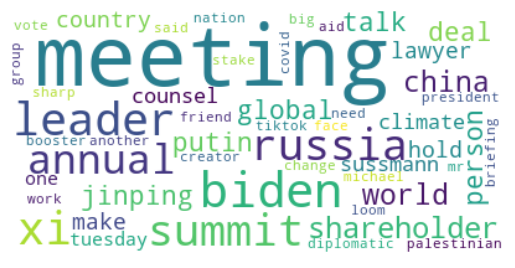

In [16]:
# wordcloud of each cluster
for i in range(K):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()